In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('Relatorios/evento_adverso.xlsx')
df['VACINA'].unique()

array(['Pfizer', 'Astrazeneca', 'Butantan', 'Janssen'], dtype=object)

In [8]:
df_vacina_gng_count = df[['NUMERO DA NOTIFICACAO' ,'VACINA', 'CLASSIFICACAO DE GRAVIDADE', 'REACAO / EVENTO ADVERSO']]
df_vacina_gng_count = df_vacina_gng_count.drop_duplicates(keep='first')
df_vacina_gng_count.shape

(31499, 4)

In [9]:
#df_vacina_gng_count['COUNT'] = 1
df_vacina_gng_count = df_vacina_gng_count.groupby(by=['VACINA', 'CLASSIFICACAO DE GRAVIDADE', 'REACAO / EVENTO ADVERSO']).count().reset_index()
df_vacina_gng_count.shape

(2476, 4)

# Astrazeneca

In [10]:
# Total de vacinas aplicadas astrazeneca
aplicadas_astra = 7275490

NÃO GRAVE

In [11]:
## NÃO GRAVE ##
df_astra_nao_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Astrazeneca') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Não grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_astra_nao_graves = df_astra_nao_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_astra_nao_graves['INCIDENCIA_POR_1000ds'] = (df_astra_nao_graves['COUNT']/aplicadas_astra*1000).round(2)
df_astra_nao_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
629,Astrazeneca,Não grave,Febre,2595,0.36
288,Astrazeneca,Não grave,Cefaleia,2458,0.34
767,Astrazeneca,Não grave,Mialgia,2437,0.33
274,Astrazeneca,Não grave,Calafrios,1018,0.14
776,Astrazeneca,Não grave,Nausea,791,0.11
424,Astrazeneca,Não grave,Dor de cabeca,710,0.10
379,Astrazeneca,Não grave,Diarreia,520,0.07
622,Astrazeneca,Não grave,Fadiga,423,0.06
441,Astrazeneca,Não grave,Dor localizada,384,0.05
1004,Astrazeneca,Não grave,Tontura,324,0.04


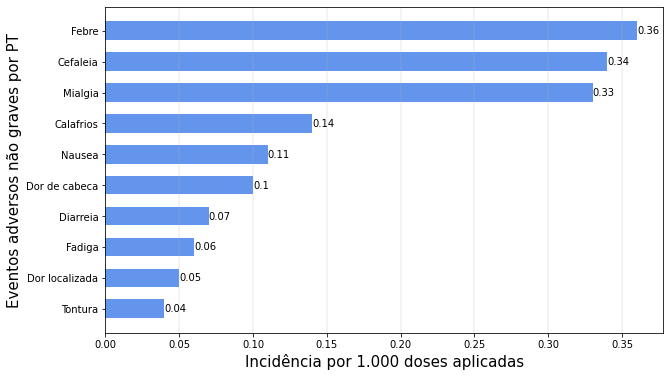

In [12]:
# GRÁFICO
#deixando em ordem decrescente
df_astra_nao_graves = df_astra_nao_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_astra_nao_graves['REACAO / EVENTO ADVERSO'], df_astra_nao_graves['INCIDENCIA_POR_1000ds'], largura, color='cornflowerblue')
plt.xlabel('Incidência por 1.000 doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos não graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_astra_nao_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 4b.png', dpi=(800), bbox_inches='tight')
plt.show()

GRAVE

In [13]:
## GRAVE ##
df_astra_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Astrazeneca') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_astra_graves = df_astra_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_astra_graves['INCIDENCIA_POR_1000ds'] = (df_astra_graves['COUNT']/aplicadas_astra*100000).round(2)
df_astra_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
7,Astrazeneca,Grave,Acidente vascular cerebral isquemico,18,0.25
92,Astrazeneca,Grave,Febre,10,0.14
52,Astrazeneca,Grave,Dispneia,7,0.10
24,Astrazeneca,Grave,Cefaleia,7,0.10
175,Astrazeneca,Grave,Sindrome de Guillain-Barre,6,0.08
110,Astrazeneca,Grave,Infarto agudo do miocardio,6,0.08
119,Astrazeneca,Grave,Mialgia,6,0.08
124,Astrazeneca,Grave,Morte,5,0.07
91,Astrazeneca,Grave,Falta de ar,5,0.07
206,Astrazeneca,Grave,Vomito,5,0.07


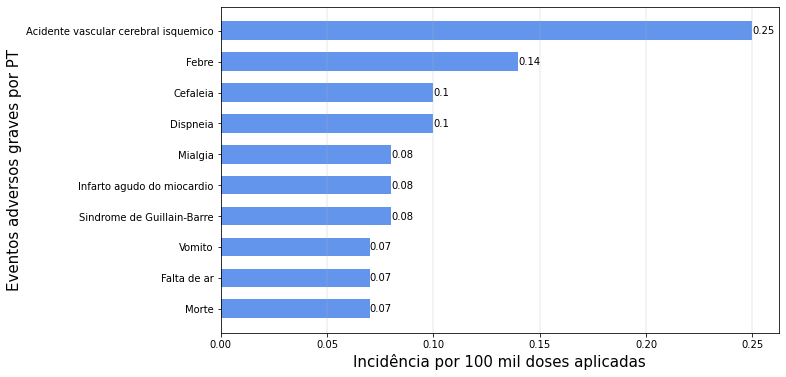

In [14]:
# GRÁFICO
#deixando em ordem decrescente
df_astra_graves = df_astra_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_astra_graves['REACAO / EVENTO ADVERSO'], df_astra_graves['INCIDENCIA_POR_1000ds'], largura, color='cornflowerblue')
plt.xlabel('Incidência por 100 mil doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_astra_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 5b.png', dpi=(800), bbox_inches='tight')
plt.show()

# Pfizer

In [15]:
# Total de vacinas aplicadas pfizer
aplicadas_pfizer = 8203840

NÃO GRAVE

In [16]:
## NÃO GRAVE ##
df_pfizer_nao_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Pfizer') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Não grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_pfizer_nao_graves = df_pfizer_nao_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_pfizer_nao_graves['INCIDENCIA_POR_1000ds'] = (df_pfizer_nao_graves['COUNT']/aplicadas_pfizer*1000).round(2)
df_pfizer_nao_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
2061,Pfizer,Não grave,Cefaleia,456,0.06
2316,Pfizer,Não grave,Mialgia,382,0.05
2238,Pfizer,Não grave,Febre,348,0.04
2130,Pfizer,Não grave,Dor de cabeca,135,0.02
2451,Pfizer,Não grave,Tosse,126,0.02
2159,Pfizer,Não grave,Dor no local de aplicacao,114,0.01
2097,Pfizer,Não grave,Diarreia,109,0.01
2323,Pfizer,Não grave,Nausea,104,0.01
2050,Pfizer,Não grave,Calafrios,101,0.01
2052,Pfizer,Não grave,Calafrios e febre,100,0.01


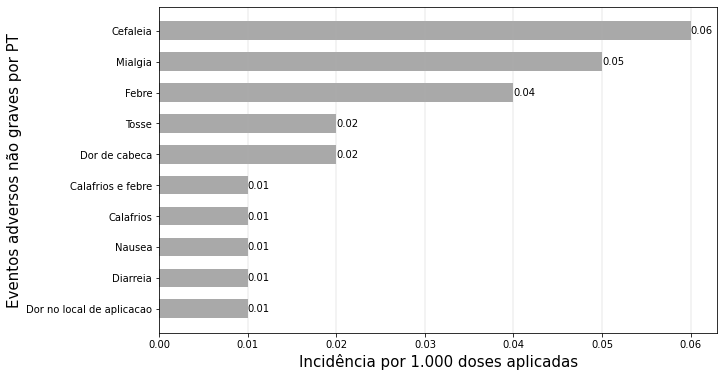

In [17]:
# GRÁFICO
#deixando em ordem decrescente
df_pfizer_nao_graves = df_pfizer_nao_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_pfizer_nao_graves['REACAO / EVENTO ADVERSO'], df_pfizer_nao_graves['INCIDENCIA_POR_1000ds'], largura, color='darkgray')
plt.xlabel('Incidência por 1.000 doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos não graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_pfizer_nao_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 4c.png', dpi=(800), bbox_inches='tight')
plt.show()

GRAVE

In [18]:
## GRAVE ##
df_pfizer_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Pfizer') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_pfizer_graves = df_pfizer_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_pfizer_graves['INCIDENCIA_POR_1000ds'] = (df_pfizer_graves['COUNT']/aplicadas_pfizer*100000).round(2)
df_pfizer_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1917,Pfizer,Grave,Cefaleia,7,0.09
1909,Pfizer,Grave,Aborto,4,0.05
1955,Pfizer,Grave,Febre,4,0.05
1935,Pfizer,Grave,Dor abd.,4,0.05
2003,Pfizer,Grave,Trombose na perna,3,0.04
1973,Pfizer,Grave,Nausea,3,0.04
1958,Pfizer,Grave,Fraqueza,2,0.02
1934,Pfizer,Grave,Dispneia,2,0.02
2000,Pfizer,Grave,Tosse,2,0.02
1992,Pfizer,Grave,SARA,2,0.02


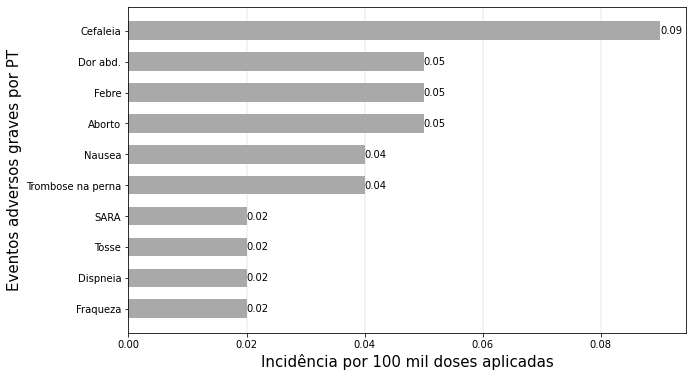

In [19]:
# GRÁFICO
#deixando em ordem decrescente
df_pfizer_graves = df_pfizer_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_pfizer_graves['REACAO / EVENTO ADVERSO'], df_pfizer_graves['INCIDENCIA_POR_1000ds'], largura, color='darkgray')
plt.xlabel('Incidência por 100 mil doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_pfizer_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 5c.png', dpi=(800), bbox_inches='tight')
plt.show()

# Coronavac / Butantan

In [20]:
# Total de vacinas aplicadas coronavac/butantan
aplicadas_coronavac = 4628180

NÃO GRAVE

In [21]:
## NÃO GRAVE ##
df_coronavac_nao_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Butantan') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Não grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_coronavac_nao_graves = df_coronavac_nao_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_coronavac_nao_graves['INCIDENCIA_POR_1000ds'] = (df_coronavac_nao_graves['COUNT']/aplicadas_coronavac*1000).round(2)
df_coronavac_nao_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1279,Butantan,Não grave,Cefaleia,617,0.13
1578,Butantan,Não grave,Mialgia,395,0.09
1323,Butantan,Não grave,Diarreia,352,0.08
1480,Butantan,Não grave,Febre,280,0.06
1362,Butantan,Não grave,Dor de garganta,227,0.05
1727,Butantan,Não grave,Tosse,216,0.05
1310,Butantan,Não grave,Coriza,181,0.04
1586,Butantan,Não grave,Nausea,170,0.04
1360,Butantan,Não grave,Dor de cabeca,140,0.03
1476,Butantan,Não grave,Fadiga,135,0.03


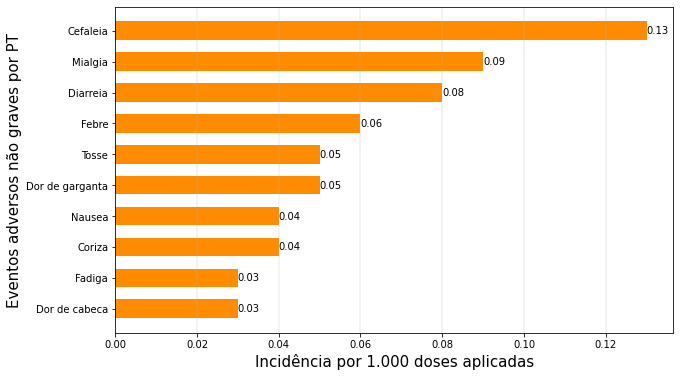

In [22]:
# GRÁFICO
#deixando em ordem decrescente
df_coronavac_nao_graves = df_coronavac_nao_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_coronavac_nao_graves['REACAO / EVENTO ADVERSO'], df_coronavac_nao_graves['INCIDENCIA_POR_1000ds'], largura, color='darkorange')
plt.xlabel('Incidência por 1.000 doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos não graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_coronavac_nao_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 4a.png', dpi=(800), bbox_inches='tight')
plt.show()

GRAVE

In [23]:
## GRAVE ##
df_coronavac_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Butantan') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_coronavac_graves = df_coronavac_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_coronavac_graves['INCIDENCIA_POR_1000ds'] = (df_coronavac_graves['COUNT']/aplicadas_coronavac*100000).round(2)
df_coronavac_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1176,Butantan,Grave,Morte,44,0.95
1114,Butantan,Grave,Dispneia,19,0.41
1078,Butantan,Grave,Acidente vascular cerebral isquemico,11,0.24
1164,Butantan,Grave,Infarto agudo do miocardio,10,0.22
1075,Butantan,Grave,AVC,8,0.17
1149,Butantan,Grave,Febre,8,0.17
1186,Butantan,Grave,Paralisia facial,6,0.13
1227,Butantan,Grave,Vomito,6,0.13
1224,Butantan,Grave,Tosse,5,0.11
1161,Butantan,Grave,Hipotensao,5,0.11


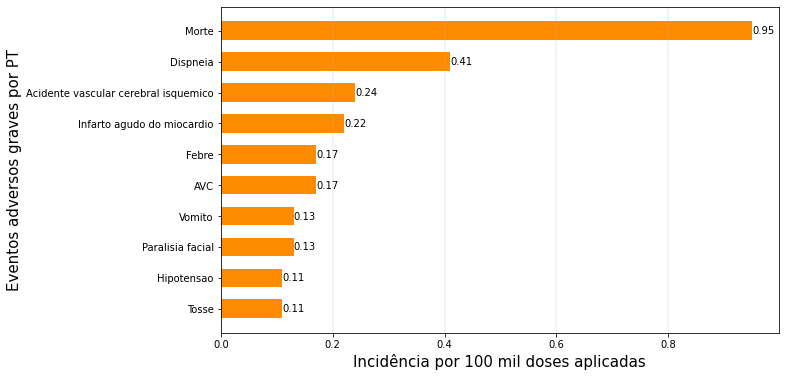

In [24]:
# GRÁFICO
#deixando em ordem decrescente
df_coronavac_graves = df_coronavac_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_coronavac_graves['REACAO / EVENTO ADVERSO'], df_coronavac_graves['INCIDENCIA_POR_1000ds'], largura, color='darkorange')
plt.xlabel('Incidência por 100 mil doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_coronavac_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 5a.png', dpi=(800), bbox_inches='tight')
plt.show()

# Janssen

In [25]:
# Total de vacinas aplicadas janssen
aplicadas_janssen = 444880

NÃO GRAVE

In [28]:
## NÃO GRAVE ##
df_janssen_nao_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Butantan') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Não grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_janssen_nao_graves = df_janssen_nao_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_janssen_nao_graves['INCIDENCIA_POR_1000ds'] = (df_janssen_nao_graves['COUNT']/aplicadas_janssen*1000).round(2)
df_janssen_nao_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1279,Butantan,Não grave,Cefaleia,617,1.39
1578,Butantan,Não grave,Mialgia,395,0.89
1323,Butantan,Não grave,Diarreia,352,0.79
1480,Butantan,Não grave,Febre,280,0.63
1362,Butantan,Não grave,Dor de garganta,227,0.51
1727,Butantan,Não grave,Tosse,216,0.49
1310,Butantan,Não grave,Coriza,181,0.41
1586,Butantan,Não grave,Nausea,170,0.38
1360,Butantan,Não grave,Dor de cabeca,140,0.31
1476,Butantan,Não grave,Fadiga,135,0.30


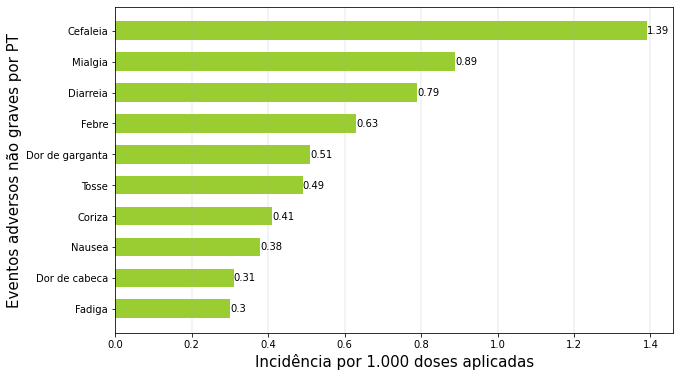

In [29]:
# GRÁFICO
#deixando em ordem decrescente
df_janssen_nao_graves = df_janssen_nao_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_janssen_nao_graves['REACAO / EVENTO ADVERSO'], df_janssen_nao_graves['INCIDENCIA_POR_1000ds'], largura, color='yellowgreen')
plt.xlabel('Incidência por 1.000 doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos não graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_janssen_nao_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 4d.png', dpi=(800), bbox_inches='tight')
plt.show()

GRAVE

In [26]:
## GRAVE ##
df_janssen_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Janssen') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_janssen_graves = df_janssen_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_janssen_graves['INCIDENCIA_POR_1000ds'] = (df_janssen_graves['COUNT']/aplicadas_janssen*100000).round(2)
df_janssen_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1765,Janssen,Grave,Cefaleia,2,0.45
1764,Janssen,Grave,Alteracoes neurologicas,1,0.22
1766,Janssen,Grave,Convulsao,1,0.22
1767,Janssen,Grave,Disartria,1,0.22
1768,Janssen,Grave,Disfagia,1,0.22
1769,Janssen,Grave,Dor,1,0.22
1770,Janssen,Grave,Encefalomielite disseminada aguda,1,0.22
1771,Janssen,Grave,Febre,1,0.22
1772,Janssen,Grave,Hemiplegia,1,0.22
1773,Janssen,Grave,Mialgia,1,0.22


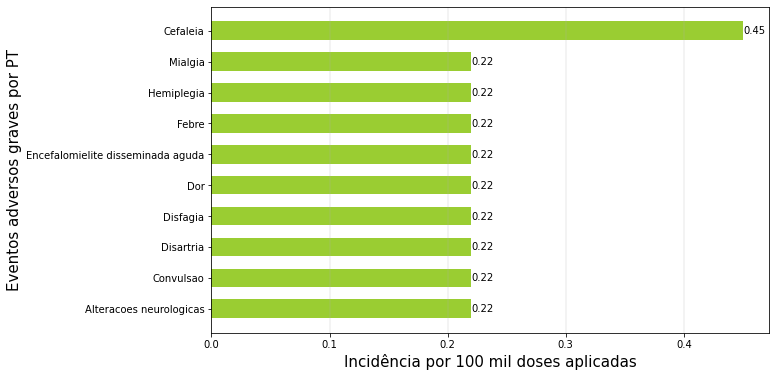

In [27]:
# GRÁFICO
#deixando em ordem decrescente
df_janssen_graves = df_janssen_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_janssen_graves['REACAO / EVENTO ADVERSO'], df_janssen_graves['INCIDENCIA_POR_1000ds'], largura, color='yellowgreen')
plt.xlabel('Incidência por 100 mil doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_janssen_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 5d.png', dpi=(800), bbox_inches='tight')
plt.show()